In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tải dữ liệu vào

In [2]:
data= pd.read_csv("Salary_Data.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
data.shape

(6704, 6)

# Tiền xử lý dữ liệu: 

In [4]:
#đổi tên các cột của dataframe
data.columns = ['Age','Gender','Degree','Job_title','Experience_year','Salary']

In [5]:
data.head()

,Age,Gender,Degree,Job_title,Experience_year,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              6702 non-null   float64
 1   Gender           6702 non-null   object 
 2   Degree           6701 non-null   object 
 3   Job_title        6702 non-null   object 
 4   Experience_year  6701 non-null   float64
 5   Salary           6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [7]:
#Xóa các hàng bị trùng
data = data.drop_duplicates(keep='first')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1792 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1791 non-null   float64
 1   Gender           1791 non-null   object 
 2   Degree           1790 non-null   object 
 3   Job_title        1791 non-null   object 
 4   Experience_year  1790 non-null   float64
 5   Salary           1788 non-null   float64
dtypes: float64(3), object(3)
memory usage: 98.0+ KB


In [9]:
# Hiển thị các giá trị bị khuyết
rows_with_nulls = data[data.isnull().any(axis=1)]
print(rows_with_nulls)

       Age  Gender             Degree            Job_title  Experience_year  \
172    NaN     NaN                NaN                  NaN              NaN   
2011  27.0    Male                NaN            Developer              7.0   
3136  31.0    Male    Master's Degree  Full Stack Engineer              8.0   
5247  26.0  Female  Bachelor's Degree             Social M              NaN   
6455  36.0    Male  Bachelor's Degree       Sales Director              6.0   

        Salary  
172        NaN  
2011  100000.0  
3136       NaN  
5247       NaN  
6455       NaN  


In [10]:
#Xóa các giá trị khiếm khuyết
data.dropna(how='any', inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1787 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1787 non-null   float64
 1   Gender           1787 non-null   object 
 2   Degree           1787 non-null   object 
 3   Job_title        1787 non-null   object 
 4   Experience_year  1787 non-null   float64
 5   Salary           1787 non-null   float64
dtypes: float64(3), object(3)
memory usage: 97.7+ KB


In [12]:
data.describe()

,Age,Experience_year,Salary
count,1787.000000,1787.000000,1787.000000
mean,35.139899,9.156128,113184.659765
std,8.213045,6.844924,51596.536766
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,70000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [13]:
data.describe(include="object")

,Gender,Degree,Job_title
count,1787,1787,1787
unique,3,7,191
top,Male,Bachelor's Degree,Software Engineer Manager
freq,966,506,127


### Xử lý các ngoại lệ

#### Giá trị hạng mục

In [14]:
data['Degree'].value_counts()

Degree
Bachelor's Degree    506
Master's Degree      446
PhD                  340
Bachelor's           262
Master's             122
High School          110
phD                    1
Name: count, dtype: int64

In [15]:
#Đổi tên các giá trị giống nhau về cùng 1 dạng
data['Degree'] = data['Degree'].replace('Bachelor\'s Degree', 'Bachelor\'s', regex=True)
data['Degree'] = data['Degree'].replace('Master\'s Degree', 'Master\'s', regex=True)
data['Degree'] = data['Degree'].replace('phD', 'PhD', regex=True)

In [16]:
data['Degree'].value_counts()

Degree
Bachelor's     768
Master's       568
PhD            341
High School    110
Name: count, dtype: int64

In [17]:
data['Gender'].value_counts()

Gender
Male      966
Female    814
Other       7
Name: count, dtype: int64

In [18]:
data['Job_title'].value_counts()

Job_title
Software Engineer Manager    127
Full Stack Engineer          122
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
                            ... 
Financial Advisor              1
Junior Designer                1
Chief Technology Officer       1
Technical Recruiter            1
Delivery Driver                1
Name: count, Length: 191, dtype: int64

#### Giá trị số

<Axes: >

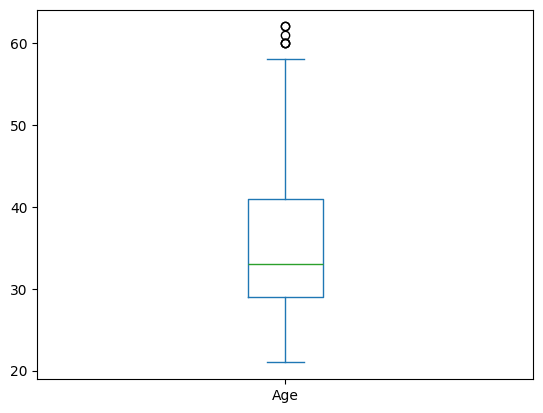

In [19]:
data['Age'].plot(kind='box')

In [20]:
# Tính Q1, Q3 và IQR
Q1 = data['Age'].quantile(0.25) #Phân vị thứ nhất
Q3 = data['Age'].quantile(0.75) #Phân vị thứ ba
IQR = Q3 - Q1 #Tứ phân vị

# Tính phạm vi của râu
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Xác định các điểm ngoại lệ
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]

# In ra các điểm ngoại lệ
print("Các điểm ngoại lệ:")
print(outliers)

# Loại bỏ các điểm ngoại lệ khỏi dữ liệu
data = data.drop(outliers.index)

Các điểm ngoại lệ:
       Age  Gender Degree                  Job_title  Experience_year  \
1211  61.0    Male    PhD  Software Engineer Manager             20.0   
1225  62.0    Male    PhD  Software Engineer Manager             19.0   
1236  62.0    Male    PhD  Software Engineer Manager             20.0   
1260  60.0    Male    PhD  Software Engineer Manager             18.0   
2396  60.0  Female    PhD  Software Engineer Manager             33.0   
2421  60.0  Female    PhD  Software Engineer Manager             34.0   

        Salary  
1211  200000.0  
1225  200000.0  
1236  200000.0  
1260  195000.0  
2396  179180.0  
2421  188651.0  


<Axes: >

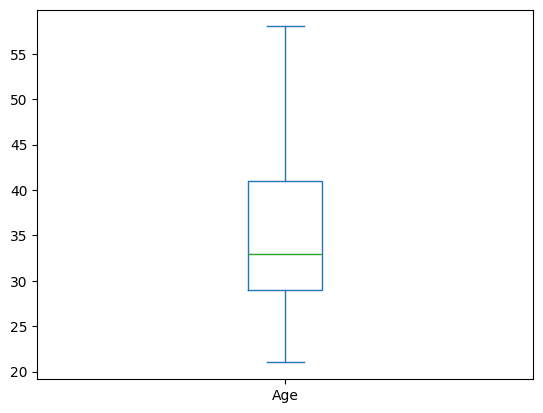

In [21]:
data['Age'].plot(kind='box')

<Axes: >

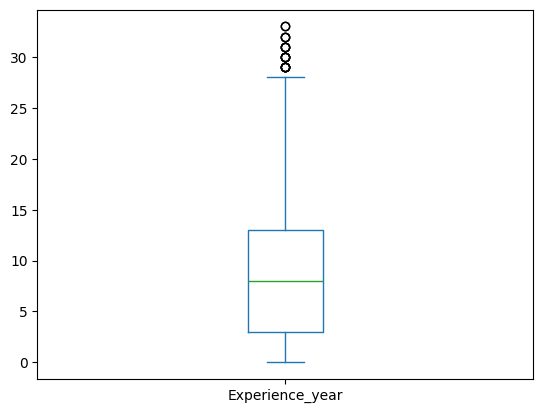

In [22]:
data['Experience_year'].plot(kind='box')

In [23]:
Q1 = data['Experience_year'].quantile(0.25)
Q3 = data['Experience_year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Experience_year'] < lower_bound) | (data['Experience_year'] > upper_bound)]
print("Các điểm ngoại lệ:")
print(outliers)
data = data.drop(outliers.index)

Các điểm ngoại lệ:
       Age  Gender       Degree                  Job_title  Experience_year  \
2378  53.0   Other  High School    Senior Project Engineer             31.0   
2387  57.0  Female          PhD        Full Stack Engineer             30.0   
2401  57.0  Female          PhD  Software Engineer Manager             33.0   
2435  57.0  Female     Master's        Full Stack Engineer             33.0   
2541  55.0  Female          PhD  Software Engineer Manager             30.0   
2543  54.0    Male   Bachelor's    Senior Project Engineer             29.0   
2554  54.0   Other  High School   Senior Software Engineer             29.0   
2557  52.0  Female          PhD  Software Engineer Manager             29.0   
2574  54.0    Male     Master's   Senior Software Engineer             31.0   
2600  54.0  Female          PhD  Software Engineer Manager             31.0   
2607  55.0  Female   Bachelor's    Senior Project Engineer             30.0   
2632  56.0  Female          PhD  

<Axes: >

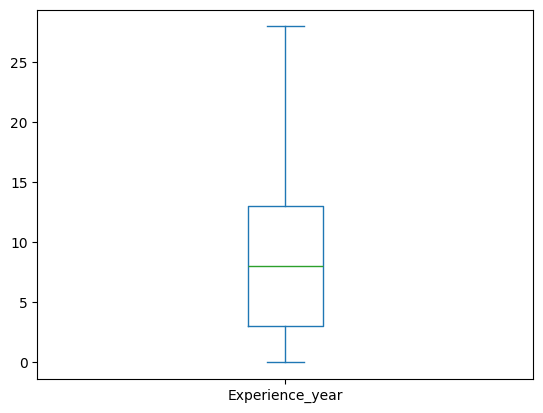

In [24]:
data['Experience_year'].plot(kind='box')

<Axes: >

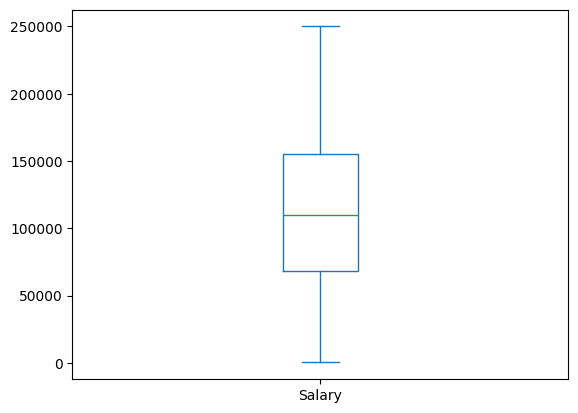

In [25]:
data['Salary'].plot(kind='box')

In [26]:
data.describe()

,Age,Experience_year,Salary
count,1761.000000,1761.000000,1761.000000
mean,34.833049,8.863146,112120.273140
std,7.864077,6.430839,51180.245032
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,68000.000000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,155000.000000
max,58.000000,28.000000,250000.000000


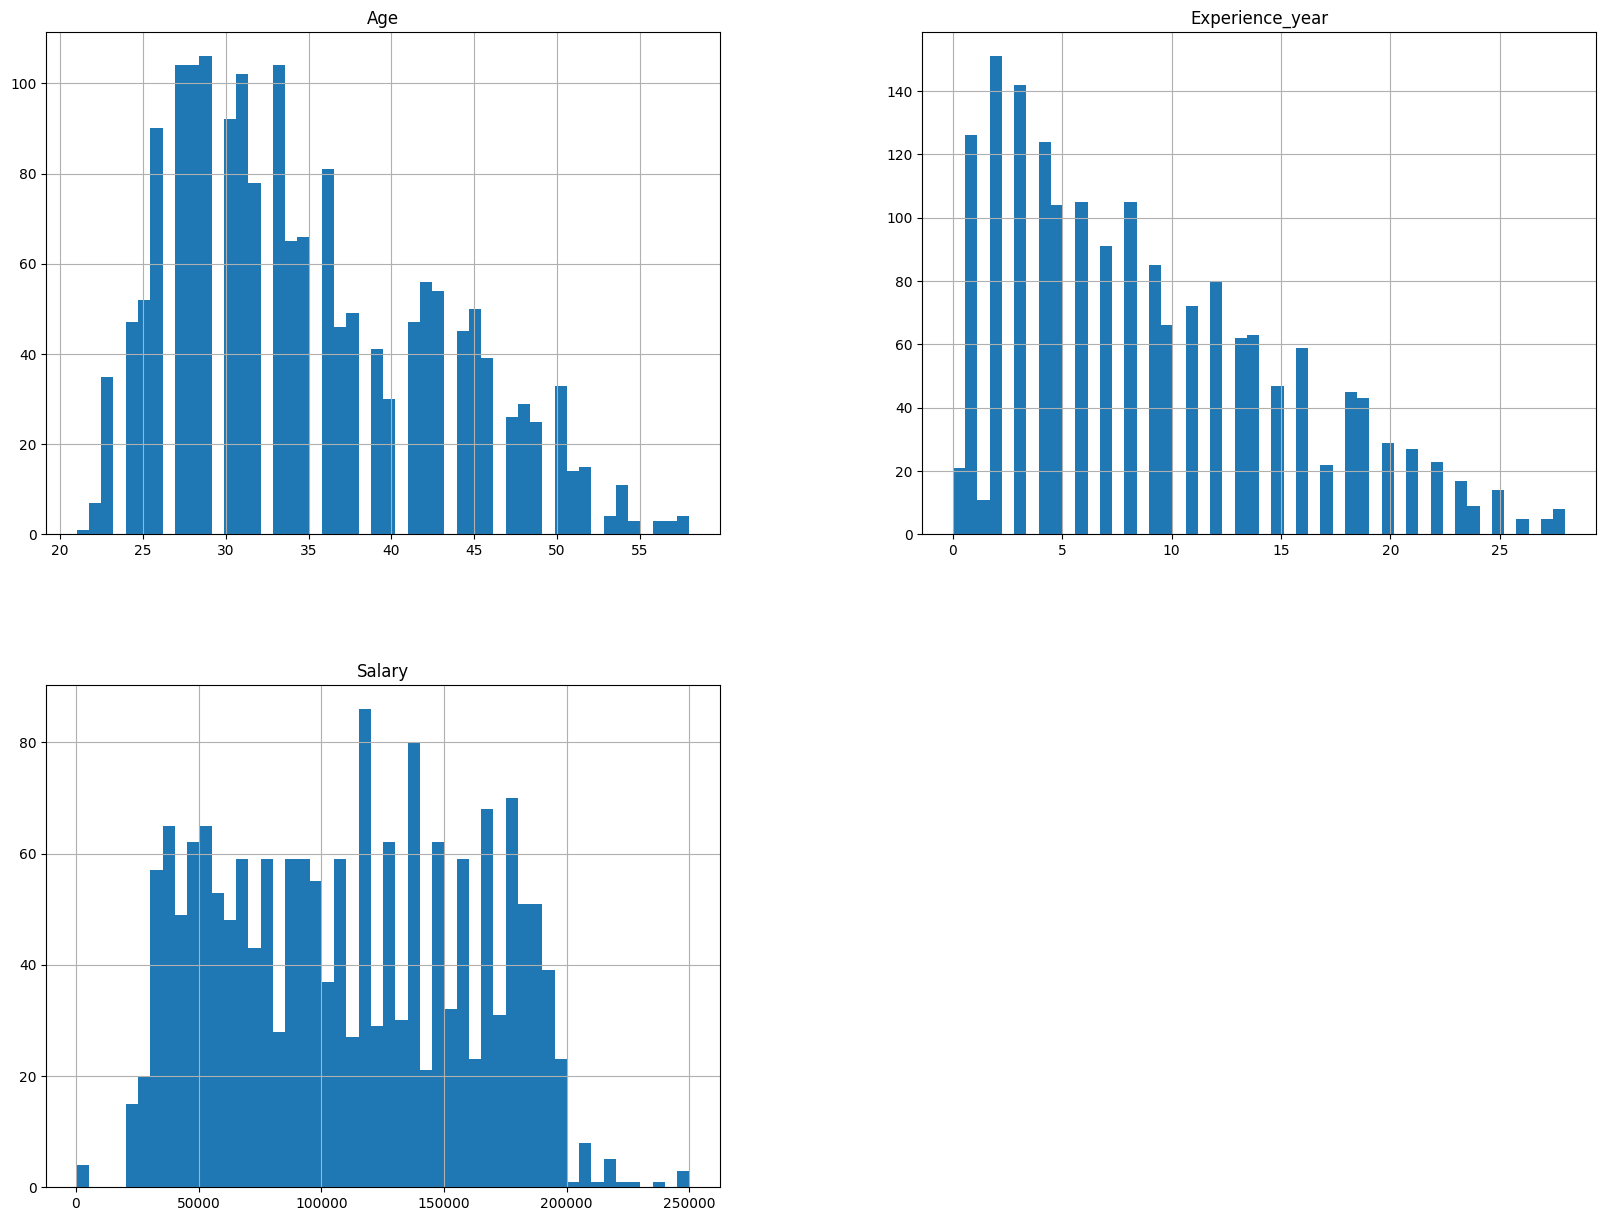

In [27]:
data.hist(bins=50, figsize=(20,15))
plt.show()

### Mã hóa các giá trị chữ

In [28]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [29]:
data['Gender_encoder']= Label_Encoder.fit_transform(data['Gender'])

In [30]:
data['Job_title_encoder']= Label_Encoder.fit_transform(data['Job_title'])

In [31]:
data['Degree_encoder'] = Label_Encoder.fit_transform(data['Degree'])

In [32]:
data.head()

,Age,Gender,Degree,Job_title,Experience_year,Salary,Gender_encoder,Job_title_encoder,Degree_encoder
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,175,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,18,2
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,144,3
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,115,0
4,52.0,Male,Master's,Director,20.0,200000.0,1,25,2


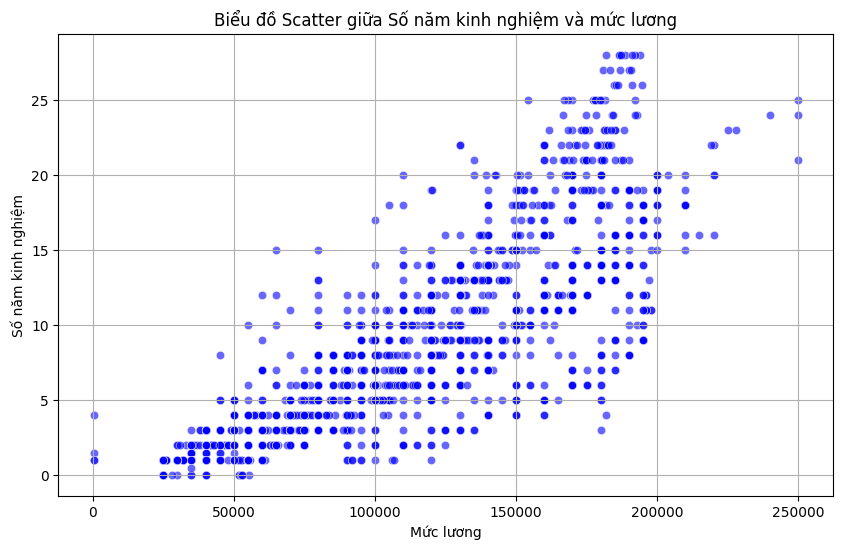

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Salary'],data['Experience_year'], color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Biểu đồ Scatter giữa Số năm kinh nghiệm và mức lương')
plt.xlabel('Mức lương')
plt.ylabel('Số năm kinh nghiệm')
plt.grid(True)
plt.show()

#### Chuẩn hóa dữ liệu

In [34]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [35]:
data['Age_scaled'] = std_scaler.fit_transform(data[['Age']]) 
data['Experience_years_scaled'] = std_scaler.fit_transform(data[['Experience_year']]) 


In [36]:
data.head()

,Age,Gender,Degree,Job_title,Experience_year,Salary,Gender_encoder,Job_title_encoder,Degree_encoder,Age_scaled,Experience_years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,175,0,-0.360354,-0.600893
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,18,2,-0.869141,-0.911982
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,144,3,1.293202,0.954556
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,115,0,0.148432,-0.289803
4,52.0,Male,Master's,Director,20.0,200000.0,1,25,2,2.183578,1.732281


# Chuẩn bị dữ liệu cho mô hình


In [37]:
data_num = data.copy()
data_num.drop(columns=['Gender', 'Degree', 'Job_title'], inplace=True)

In [38]:
Attribute=["Age","Experience_year","Gender_encoder","Job_title_encoder","Degree_encoder","Salary"]
corr_Matrix = data_num[Attribute].corr()
corr_Matrix["Salary"].sort_values(ascending=False)

Salary               1.000000
Experience_year      0.827170
Age                  0.763189
Degree_encoder       0.515806
Job_title_encoder    0.132132
Gender_encoder       0.108151
Name: Salary, dtype: float64

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Experience_year', ylabel='Age'>,
        <Axes: xlabel='Gender_encoder', ylabel='Age'>,
        <Axes: xlabel='Job_title_encoder', ylabel='Age'>,
        <Axes: xlabel='Degree_encoder', ylabel='Age'>,
        <Axes: xlabel='Salary', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Experience_year'>,
        <Axes: xlabel='Experience_year', ylabel='Experience_year'>,
        <Axes: xlabel='Gender_encoder', ylabel='Experience_year'>,
        <Axes: xlabel='Job_title_encoder', ylabel='Experience_year'>,
        <Axes: xlabel='Degree_encoder', ylabel='Experience_year'>,
        <Axes: xlabel='Salary', ylabel='Experience_year'>],
       [<Axes: xlabel='Age', ylabel='Gender_encoder'>,
        <Axes: xlabel='Experience_year', ylabel='Gender_encoder'>,
        <Axes: xlabel='Gender_encoder', ylabel='Gender_encoder'>,
        <Axes: xlabel='Job_title_encoder', ylabel='Gender_encoder'>,
        <Axes: xlabel='Degree_encoder',

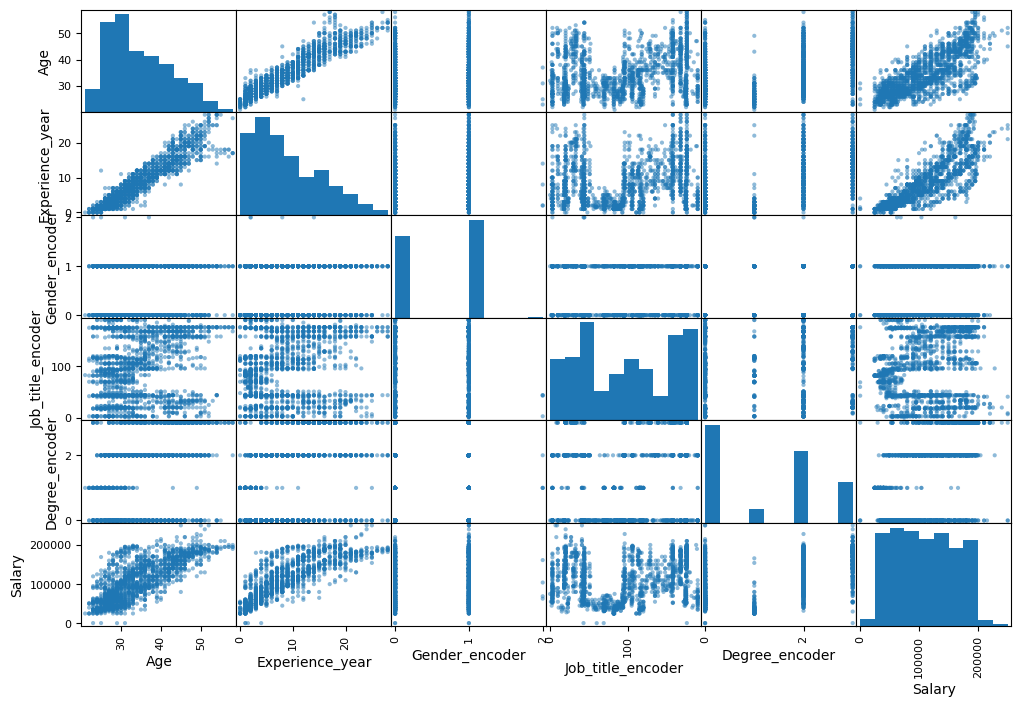

In [39]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_num[Attribute], figsize=(12,8))

#### Ta thấy, sự tương quan giữa Salary với Job_title và Gender là 0.132132 và 0.108151. Chúng khá nhỏ nên ta sẽ bỏ những thuộc tính này đi. Khi ấy, ta chỉ còn thuộc tính chữ là Degree.

In [40]:
#Ta mã hóa lại Degree theo OneHotEncoder.
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['Degree']

encoder = OneHotEncoder(sparse_output=False) 
encoded_data = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1) 



In [41]:
data.head()

,Age,Gender,Degree,Job_title,Experience_year,Salary,Gender_encoder,Job_title_encoder,Degree_encoder,Age_scaled,Experience_years_scaled,Degree_Bachelor's,Degree_High School,Degree_Master's,Degree_PhD
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,175,0,-0.360354,-0.600893,1.0,0.0,0.0,0.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,18,2,-0.869141,-0.911982,0.0,0.0,1.0,0.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,144,3,1.293202,0.954556,0.0,0.0,0.0,1.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,115,0,0.148432,-0.289803,1.0,0.0,0.0,0.0
4,52.0,Male,Master's,Director,20.0,200000.0,1,25,2,2.183578,1.732281,0.0,0.0,1.0,0.0


In [42]:
data.rename(columns={'Degree_Bachelor\'s': 'Bachelor'}, inplace=True)
data.rename(columns={'Degree_High School': 'High_School'}, inplace=True)
data.rename(columns={'Degree_Master\'s': 'Master'}, inplace=True)
data.rename(columns={'Degree_PhD': 'PhD'}, inplace=True)

In [43]:
data.head()

,Age,Gender,Degree,Job_title,Experience_year,Salary,Gender_encoder,Job_title_encoder,Degree_encoder,Age_scaled,Experience_years_scaled,Bachelor,High_School,Master,PhD
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,175,0,-0.360354,-0.600893,1.0,0.0,0.0,0.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,18,2,-0.869141,-0.911982,0.0,0.0,1.0,0.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,144,3,1.293202,0.954556,0.0,0.0,0.0,1.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,115,0,0.148432,-0.289803,1.0,0.0,0.0,0.0
4,52.0,Male,Master's,Director,20.0,200000.0,1,25,2,2.183578,1.732281,0.0,0.0,1.0,0.0


#### Dữ liệu cuối cùng đưa vào mô hình

In [44]:

X= data[['Age','Experience_year','Bachelor','High_School','Master','PhD']]
y=data['Salary']

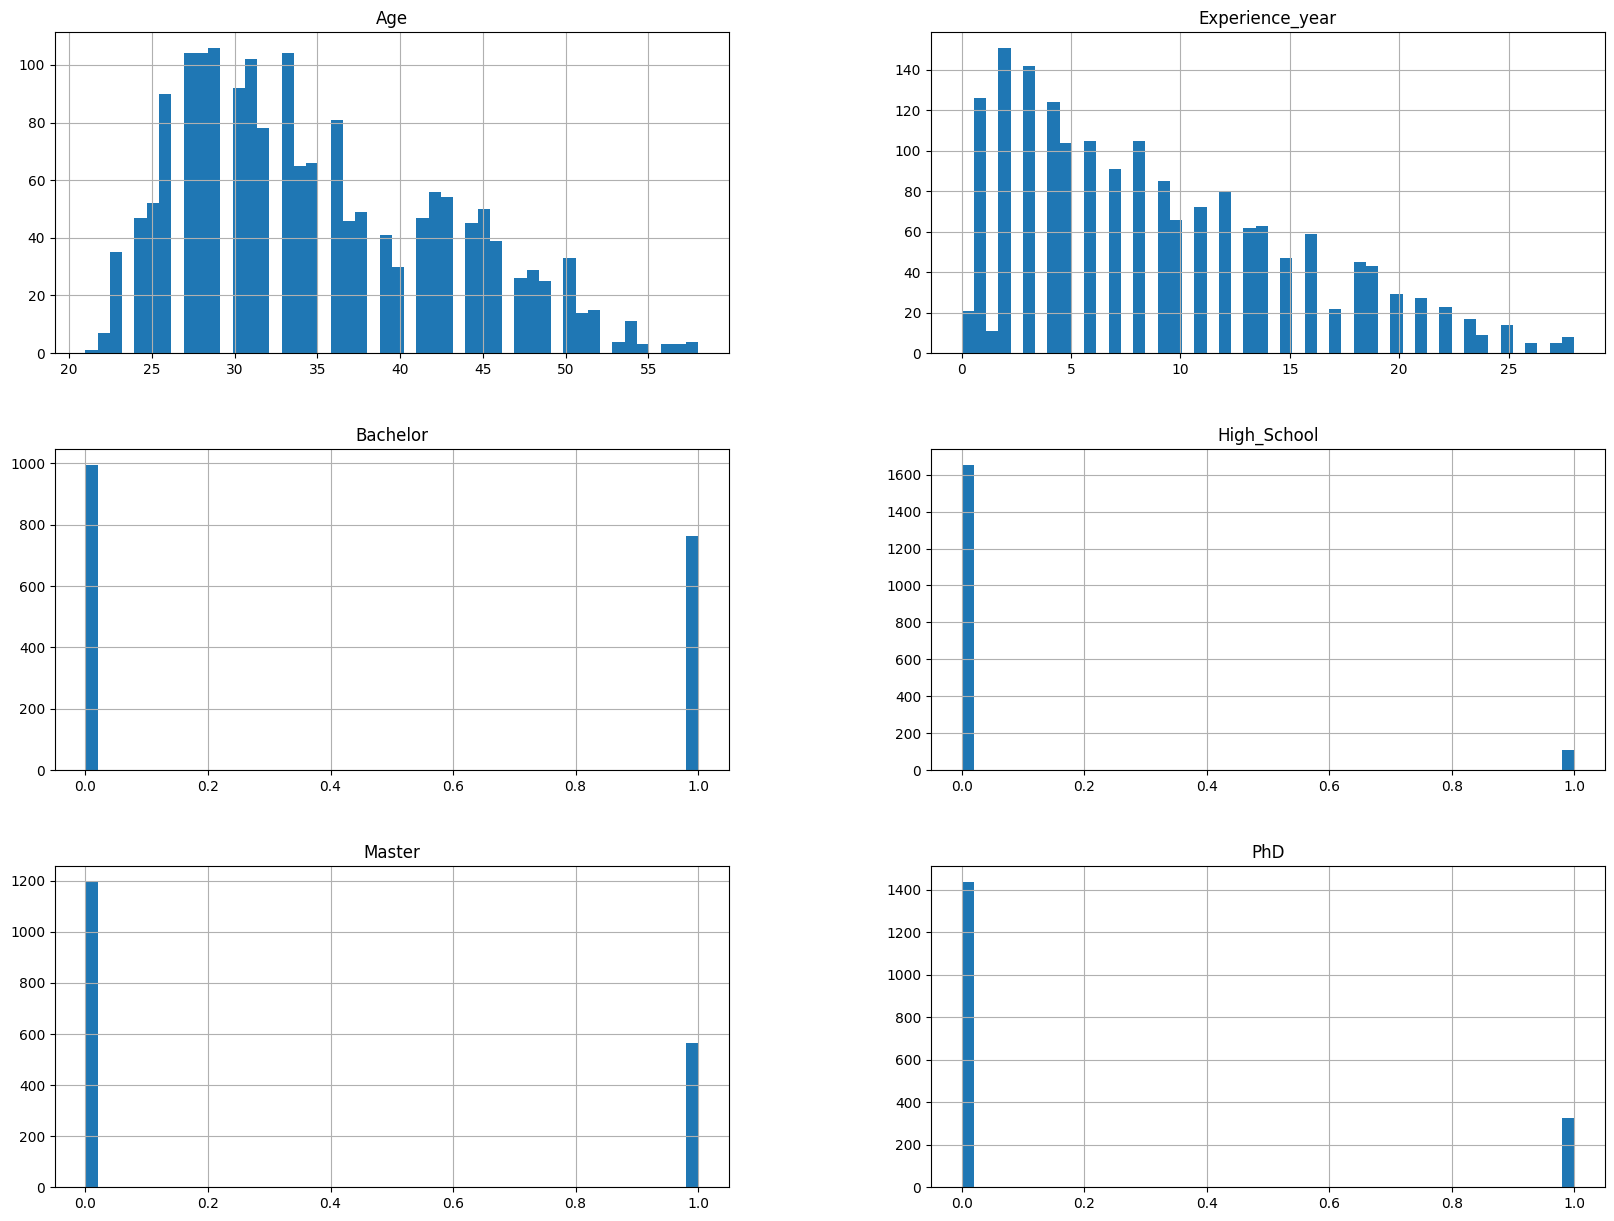

In [45]:
X.hist(bins=50, figsize=(20,15))
plt.show()

In [46]:
X= data[['Age_scaled','Experience_years_scaled','Bachelor','High_School','Master','PhD']]

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age_scaled               1761 non-null   float64
 1   Experience_years_scaled  1761 non-null   float64
 2   Bachelor                 1761 non-null   float64
 3   High_School              1761 non-null   float64
 4   Master                   1761 non-null   float64
 5   PhD                      1761 non-null   float64
dtypes: float64(6)
memory usage: 82.7 KB


### Chia dữ liệu thành tập train và test

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1408 entries, 383 to 1126
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age_scaled               1408 non-null   float64
 1   Experience_years_scaled  1408 non-null   float64
 2   Bachelor                 1408 non-null   float64
 3   High_School              1408 non-null   float64
 4   Master                   1408 non-null   float64
 5   PhD                      1408 non-null   float64
dtypes: float64(6)
memory usage: 77.0 KB


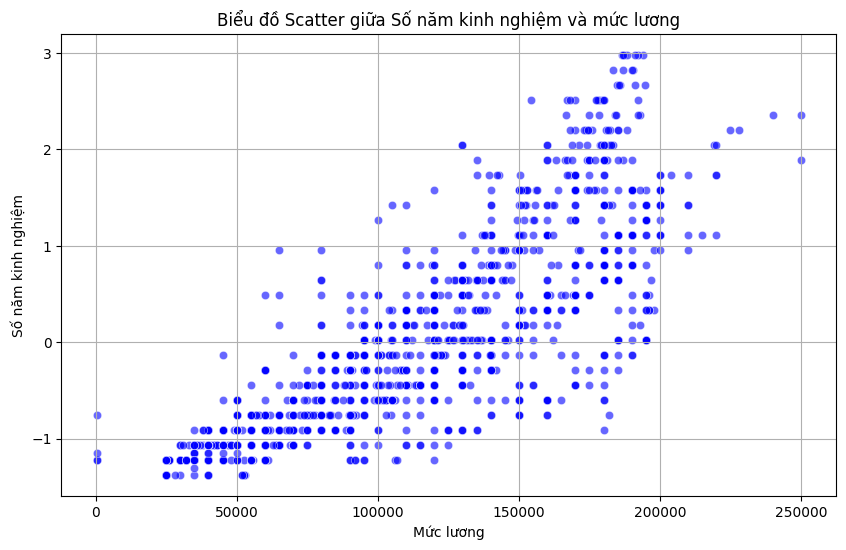

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train,X_train['Experience_years_scaled'], color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Biểu đồ Scatter giữa Số năm kinh nghiệm và mức lương')
plt.xlabel('Mức lương')
plt.ylabel('Số năm kinh nghiệm')
plt.grid(True)
plt.show()


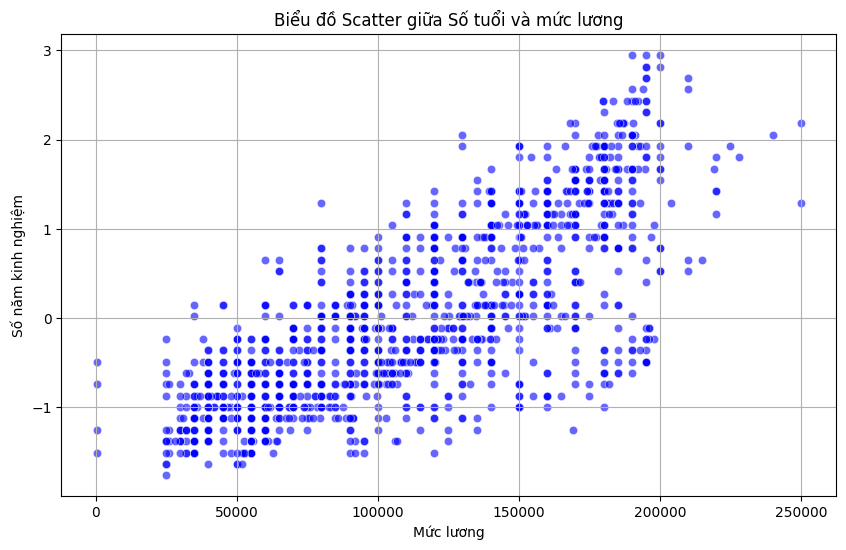

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train,X_train['Age_scaled'], color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Biểu đồ Scatter giữa Số tuổi và mức lương')
plt.xlabel('Mức lương')
plt.ylabel('Số năm kinh nghiệm')
plt.grid(True)
plt.show()

In [53]:
dataabc = data.copy()
dataabc=  dataabc.sort_values(by='Salary', ascending=True)

In [54]:
dataabc.head()

,Age,Gender,Degree,Job_title,Experience_year,Salary,Gender_encoder,Job_title_encoder,Degree_encoder,Age_scaled,Experience_years_scaled,Bachelor,High_School,Master,PhD
248,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0,1,60,0,-0.741944,-1.145300,1.0,0.0,0.0,0.0
1370,31.0,Female,Bachelor's,Junior HR Coordinator,4.0,500.0,0,69,0,-0.487551,-0.756437,1.0,0.0,0.0,0.0
643,25.0,Female,Bachelor's,Front end Developer,1.0,550.0,0,43,0,-1.250731,-1.223072,1.0,0.0,0.0,0.0
898,23.0,Male,PhD,Software Engineer Manager,1.0,579.0,1,176,3,-1.505124,-1.223072,0.0,0.0,0.0,1.0
1451,23.0,Female,High School,Receptionist,0.0,25000.0,0,111,1,-1.505124,-1.378617,0.0,1.0,0.0,0.0


# Xây dựng mô hình Linear Regression với công thức bình phương tối thiểu và với Gradien Descent

In [55]:
Xbar = np.c_[np.ones((X_train.shape[0],1)),X_train] # Tính Xbar

### Theo công thức bình phương tối thiểu: 

In [56]:
A= Xbar.T.dot(Xbar)
b = np.dot(Xbar.T, y_train)
W_bptt = w = np.dot(np.linalg.pinv(A), b)
print("Trọng số: \n",W_bptt)

Trọng số: 
 [86222.30593046 -7139.75946436 42225.58301376 18770.78202664
 -8197.63271778 31094.57311632 44554.58350528]


### Theo Gradient Descent

In [57]:
y = y_train.values.reshape(-1, 1)

In [58]:
#Đạo hàm của hàm mất mát
def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)
#Hàm mất mát
def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2;

In [59]:
def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(10000):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-6:
            break 
        w.append(w_new)
    return (w, it) 

w_init = np.random.randn(Xbar.shape[1], 1)
(w1, it1) = myGD(w_init, grad, 0.1)
W_gd= w1[-1]
print( "Trọng số: \n",W_gd)
print('after %d iterations.' %(it1+1))

Trọng số: 
 [[86222.37013802]
 [-7139.75938691]
 [42225.58293964]
 [18770.7178186 ]
 [-8197.69690872]
 [31094.50891415]
 [44554.51928429]]
after 3049 iterations.


### In ra dự đoán

In [60]:
# Tính toán dự đoán trên tập dữ liệu kiểm tra
X_bar_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_bptt = X_bar_test.dot(W_bptt)
y_pred_gd = X_bar_test.dot(W_gd)

In [61]:
i=15
X_in = X_test[i:i+1]
print("Giá trị đầu vào: \n",X_in)
print("Giá trị dự đoán theo công thức bình phương tối thiểu: ", y_pred_bptt[i-1])
print("Giá trị dự đoán theo Gradient Descent: ", y_pred_gd[i-1][0])
print("Giá trị thực tế: ",y_test.iloc[i-1])

Giá trị đầu vào: 
      Age_scaled  Experience_years_scaled  Bachelor  High_School  Master  PhD
582   -1.250731                -1.223072       1.0          0.0     0.0  0.0
Giá trị dự đoán theo công thức bình phương tối thiểu:  67029.7414105708
Giá trị dự đoán theo Gradient Descent:  67029.74141205536
Giá trị thực tế:  65000.0


### Đánh giá mô hình

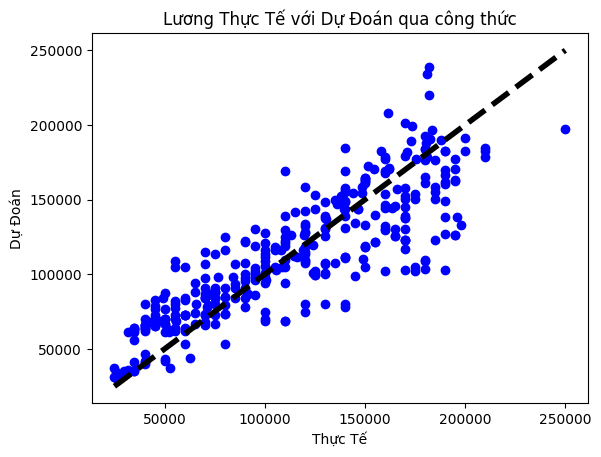

In [62]:
plt.scatter(y_test, y_pred_bptt, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Thực Tế')
plt.ylabel('Dự Đoán')
plt.title('Lương Thực Tế với Dự Đoán qua công thức')
plt.show()

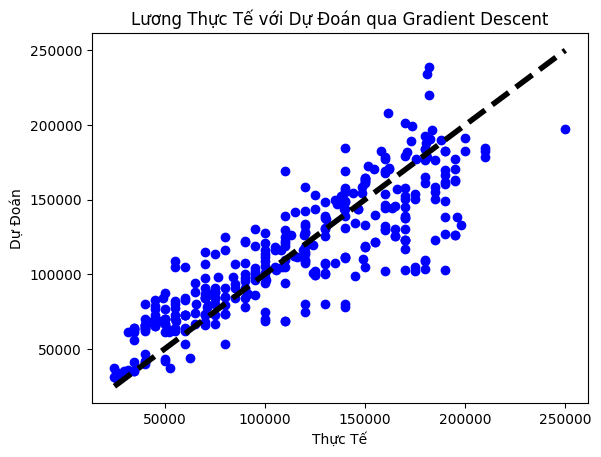

In [63]:
plt.scatter(y_test, y_pred_gd, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Thực Tế')
plt.ylabel('Dự Đoán')
plt.title('Lương Thực Tế với Dự Đoán qua Gradient Descent')
plt.show()

In [64]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Tính R-squared
r2_bptt = r2_score(y_test, y_pred_bptt)
r2_gd = r2_score(y_test, y_pred_gd)

# Tính MAE
mae_bptt = mean_absolute_error(y_test, y_pred_bptt)
mae_gd = mean_absolute_error(y_test, y_pred_gd)

#Tính RMSE
mse_bptt = mean_squared_error(y_test, y_pred_bptt)
mse_gd = mean_squared_error(y_test, y_pred_gd)
rmse_bptt = np.sqrt(mse_bptt)
rmse_gd = np.sqrt(mse_gd)

print(f'R-squared cho phương pháp bình phương tối thiểu: {r2_bptt*100:.3f}%')
print(f'R-squared cho phương pháp Gradient Descent: {r2_gd*100:.3f}%')
print(f'MAE cho phương pháp bình phương tối thiểu: {mae_bptt:.2f}')
print(f'MAE cho phương pháp Gradient Descent: {mae_gd:.2f}')
print(f'RMSE cho phương pháp bình phương tối thiểu: {rmse_bptt:.2f}')
print(f'RMSE cho phương pháp Gradient Descent: {rmse_gd:.2f}')


R-squared cho phương pháp bình phương tối thiểu: 73.171%
R-squared cho phương pháp Gradient Descent: 73.171%
MAE cho phương pháp bình phương tối thiểu: 20354.91
MAE cho phương pháp Gradient Descent: 20354.91
RMSE cho phương pháp bình phương tối thiểu: 26229.11
RMSE cho phương pháp Gradient Descent: 26229.11


## Một vài mô hình khác

### Mô hình Cây quyết định

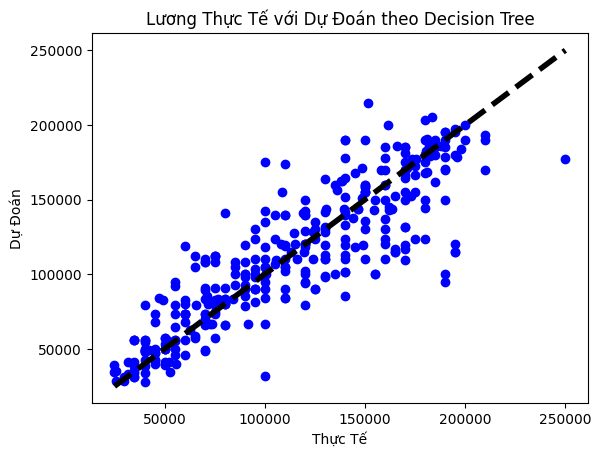

In [65]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

y_pred_dt = tree_reg.predict(X_test)

plt.scatter(y_test, y_pred_dt, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Thực Tế')
plt.ylabel('Dự Đoán')
plt.title('Lương Thực Tế với Dự Đoán theo Decision Tree')
plt.show()

In [66]:
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
print(f'R-squared cho mô hình cây quyết định: {r2_dt*100:.3f}%')
print(f'MAE cho mô hình cây quyết định: {mae_dt:.2f}')
print(f'RMSE cho mô hình cây quyết định: {rmse_dt:.2f}')

R-squared cho mô hình cây quyết định: 76.428%
MAE cho mô hình cây quyết định: 17277.81
RMSE cho mô hình cây quyết định: 24585.68


### Mô hình RandomForest

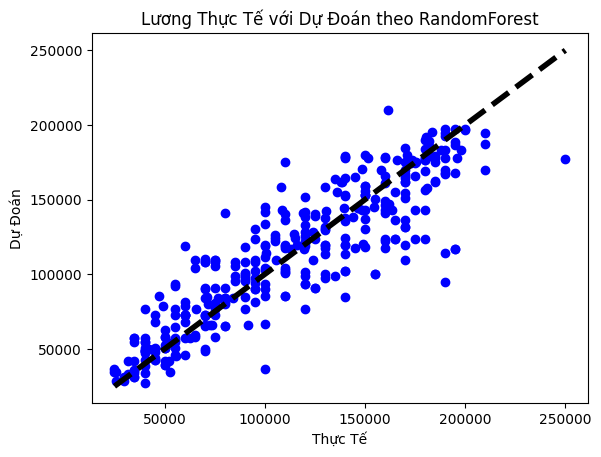

In [67]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Thực Tế')
plt.ylabel('Dự Đoán')
plt.title('Lương Thực Tế với Dự Đoán theo RandomForest')
plt.show()

In [68]:
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f'R-squared cho mô hình Random Forest: {r2_rf*100:.3f}%')
print(f'MAE cho mô hình Random Forest: {mae_rf:.2f}')
print(f'RMSE cho mô hình Random Forest: {rmse_rf:.2f}')

R-squared cho mô hình Random Forest: 79.492%
MAE cho mô hình Random Forest: 16670.52
RMSE cho mô hình Random Forest: 22932.31


### So sánh giữa các mô hình.

In [69]:
print(f'R-squared cho phương pháp bình phương tối thiểu: {r2_bptt*100:.3f}%')
print(f'R-squared cho phương pháp Gradient Descent: {r2_gd*100:.3f}%')
print(f'R-squared cho mô hình cây quyết định: {r2_dt*100:.3f}%')
print(f'R-squared cho mô hình Random Forest: {r2_rf*100:.3f}%')
print("========================================================================")
print(f'MAE cho phương pháp bình phương tối thiểu: {mae_bptt:.2f}')
print(f'MAE cho phương pháp Gradient Descent: {mae_gd:.2f}')
print(f'MAE cho mô hình cây quyết định: {mae_dt:.2f}')
print(f'MAE cho mô hình Random Forest: {mae_rf:.2f}')
print("========================================================================")
print(f'RMSE cho phương pháp bình phương tối thiểu: {rmse_bptt:.2f}')
print(f'RMSE cho phương pháp Gradient Descent: {rmse_gd:.2f}')
print(f'RMSE cho mô hình cây quyết định: {rmse_dt:.2f}')
print(f'RMSE cho mô hình Random Forest: {rmse_rf:.2f}')

R-squared cho phương pháp bình phương tối thiểu: 73.171%
R-squared cho phương pháp Gradient Descent: 73.171%
R-squared cho mô hình cây quyết định: 76.428%
R-squared cho mô hình Random Forest: 79.492%
MAE cho phương pháp bình phương tối thiểu: 20354.91
MAE cho phương pháp Gradient Descent: 20354.91
MAE cho mô hình cây quyết định: 17277.81
MAE cho mô hình Random Forest: 16670.52
RMSE cho phương pháp bình phương tối thiểu: 26229.11
RMSE cho phương pháp Gradient Descent: 26229.11
RMSE cho mô hình cây quyết định: 24585.68
RMSE cho mô hình Random Forest: 22932.31


In [70]:
i=9
print("Giá trị dự đoán theo công thức bình phương tối thiểu: ", y_pred_bptt[i-1])
print("Giá trị dự đoán theo Gradient Descent: ", y_pred_gd[i-1][0])
print("Giá trị dự đoán theo cây quyết định: ", y_pred_dt[i-1])
print("Giá trị dự đoán theo rừng ngẫu nhiên: ", y_pred_rf[i-1])
print("Giá trị thực tế: ",y_test.iloc[i-1])

Giá trị dự đoán theo công thức bình phương tối thiểu:  79257.53386297246
Giá trị dự đoán theo Gradient Descent:  79257.533851249
Giá trị dự đoán theo cây quyết định:  80269.18181818182
Giá trị dự đoán theo rừng ngẫu nhiên:  79872.67245090219
Giá trị thực tế:  80000.0
